# PyTorch Neural Network Digits Classifier
**Dataset:** MNIST

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import matplotlib.pyplot as plt
from torchvision import datasets, transforms

from torch import nn
from torch import optim
import torch.nn.functional as F

**Download _MNIST_ dataset**  
I will be using batches of 64

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [4]:
def print_sample_digit(index):
    print(str.format('Label: {}',labels[index]))
    plt.figure(num=None, figsize=(1, 1), dpi=56, facecolor='w', edgecolor='k')
    plt.imshow(images[index].numpy().squeeze(), cmap='Greys_r');

Label: 2


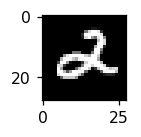

In [5]:
print_sample_digit(0)

Label: 0


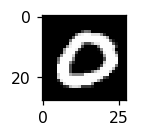

In [6]:
print_sample_digit(1)

In [7]:
# Input are images of 28 x 28 pixels each
input_size = 784 
# Hidden layers size
h1_size, h2_size, h3_size = 400,200,100 
# Output will be 10 since we will get the softmax probability for each digit (0-9)
output_size = 10 

### Define the model

In [43]:
model = nn.Sequential(
            nn.Linear(input_size, h1_size),
            nn.ReLU(),
            nn.Linear(h1_size, h2_size),
            nn.ReLU(),
            nn.Linear(h2_size, h3_size),
            nn.ReLU(),
            nn.Linear(h3_size, output_size),
            nn.Softmax(1)
            )        

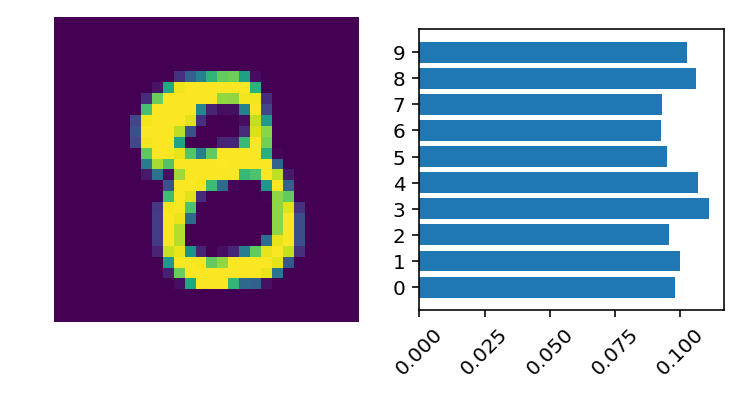

In [100]:
# Get images and labels
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)

images.requires_grad_(True)

# Feedforward the network
ps = model.forward(images[0,:])

# Print result for the first image
fig, (ax1, ax2) = plt.subplots(figsize=(6,6), ncols=2)
ps = ps.data.numpy().squeeze()

ax1.imshow(images[0].resize_(1, 28, 28).numpy().squeeze())
ax1.axis('off')

ax2.barh(np.arange(10), ps )
ax2.set_aspect(0.01)
ax2.set_yticks(np.arange(10))
plt.xticks(rotation='45')

plt.show();

# Right now since the Neural Network did not update weights yet all probabilities are roughtly the same